In [5]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict

In [8]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    num_4: int
    num_6: int
    
    sr: float
    bpb: float
    boundry_percent: float
    summary: str
    
def calc_strikeRate(state: BatsmanState) -> BatsmanState:
    strike_rate = state['runs']/state['balls']
    state['sr'] = strike_rate * 100.0
    return {'sr': strike_rate}
    
def calc_bpb(state: BatsmanState) -> BatsmanState:
    bpb = state['balls']/(state['num_4'] + state['num_6'])
    state['bpb'] = bpb
    return {'bpb':bpb}

def calc_boundry_percent(state: BatsmanState) -> BatsmanState:
    boundry_percent = (state['num_4']*4 + state['num_6']*6)/state['runs']
    state['boundry_percent'] = boundry_percent
    return {'boundry_percent': boundry_percent}
    
def summary(state: BatsmanState) -> BatsmanState:
        
        summary = f"""
            Strike rate - {state['sr']} \n
            Balls per boundry - {state['bpb']} \n
            Boundry percent - {state['boundry_percent']}
        """
        state['summary'] = summary
        return {'summary':summary }

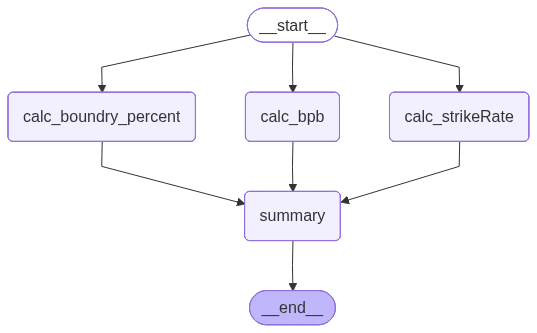

In [9]:
graph = StateGraph(BatsmanState)

## ADD nodes
graph.add_node('calc_strikeRate',calc_strikeRate)
graph.add_node('calc_bpb',calc_bpb)
graph.add_node('calc_boundry_percent',calc_boundry_percent)
graph.add_node('summary',summary)

## add edges
graph.add_edge(START,'calc_strikeRate')
graph.add_edge(START,'calc_bpb')
graph.add_edge(START,'calc_boundry_percent')

graph.add_edge('calc_strikeRate','summary')
graph.add_edge('calc_bpb','summary')
graph.add_edge('calc_boundry_percent','summary')

graph.add_edge('summary',END)

## compile

workflow = graph.compile()

workflow

In [10]:
## execute workflow

initial_state = {'runs':100,
                 'balls': 50,
                 'num_4':6,
                 'num_6':4
                 }

workflow.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'num_4': 6,
 'num_6': 4,
 'sr': 2.0,
 'bpb': 5.0,
 'boundry_percent': 0.48,
 'summary': '\n            Strike rate - 2.0 \n\n            Balls per boundry - 5.0 \n\n            Boundry percent - 0.48\n        '}